In [1]:
# Import the necessary libraries
import sys
import site

try:
    import serial
    import serial.tools.list_ports
except:
    !{sys.executable} -m pip install --user pyserial
    sys.path.append(site.USER_BASE+'/python38/site-packages')
    import serial
    import serial.tools.list_ports
    
import time
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# List the COM ports, and the devices that are connected to them
ports = serial.tools.list_ports.comports();

for n in ports:
    print(n.device, n.description);

COM3 Intel(R) Active Management Technology - SOL (COM3)
COM4 Arduino Uno (COM4)


In [3]:
# Define the ports for communicating with the Arduinos
arduinoUno   = serial.Serial(port='COM4', baudrate=  9600, timeout=.1);


In [4]:
# Check that we can close the ports (if necessary): this should execute without errors
arduinoUno.close()

#
print('Ports closed')
time.sleep(1.0)
#
# Re-open the ports
arduinoUno.open()

#
print('Ports re-opened')

Ports closed
Ports re-opened


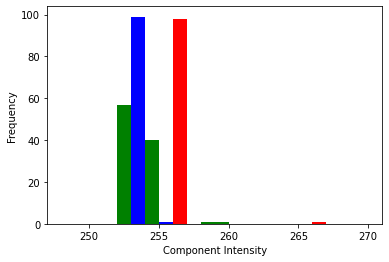

In [96]:
# Test the circuit
arduinoUno.flush();
npts = 100
red = []#np.array([])
green = []#np.array([])
blue = []#np.array([])
bin_edges = np.linspace(0,300,301)
for n in range(npts):
    time.sleep(0.5)
    datamessy = str(arduinoUno.readline())[2:-2]
    data = datamessy.split(",")
    red.append(int(data[0]))
    green.append(int(data[1]))
    blue.append(int(data[2]))
    arduinoUno.flush()   
    
red = np.asarray(red)
green = np.asarray(green)
blue = np.asarray(blue)

total = np.append(green, red)
total = np.append(blue, total)
min = np.amin(total)
max = np.amax(total)

plt.xlabel("Component Intensity")
plt.ylabel("Frequency")
plt.xlim([(min-5), (max+5)])
plt.hist(red, bin_edges, color = 'r');
plt.hist(green, bin_edges, color = 'g');
plt.hist(blue, bin_edges, color = 'b');